BoxPlots for All patients

In [1]:
#Import Modules

import sys
sys.path.append("..") #give this script access to all modules in parent directory
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import skew
from Data_Cleaning import preprocess
from Data_Cleaning import preprocess_sickbay
import Filtering
import Actigraph_Metrics

c:\Users\sidha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\sidha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:59: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Define Functions

In [2]:
def MAD_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    #label axes
    ax[0,0].set_xlabel('SBS Score', fontsize = 8)
    ax[0,0].set_ylabel('MAD', fontsize = 8)
    ax[0,1].set_xlabel('SBS Score', fontsize = 8)
    ax[0,1].set_ylabel('Skew', fontsize = 8)
    ax[1,0].set_xlabel('SBS Score', fontsize = 8)
    ax[1,0].set_ylabel('Mean', fontsize = 8)
    ax[1,1].set_xlabel('SBS Score', fontsize = 8)
    ax[1,1].set_ylabel('Standard Deviation', fontsize = 8)
    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def vitals_boxplot(sbs, vitals_signal, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = vitals_signal[i]
        if np.mean(signal) !=0:
            sbs_skew_dict[sbs_value].append(skew(signal))
            sbs_stdev_dict[sbs_value].append(np.std(signal))
            sbs_mean_dict[sbs_value].append(np.mean(signal))
        else:
            print(f'not enough data at sbs index {i}, flag_list detected') #flag list was detected here. Note: If you go into matlab to cross-check, be aware matlab indices start at 1
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
    
    #Drop NaN Values
    sbs_skew_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_skew_dict.items()}
    sbs_stdev_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_stdev_dict.items()}
    sbs_mean_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_mean_dict.items()}
    
    # Box plot: this version will show the outliers too
    ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0].set_xlabel('SBS Score', fontsize = 10)
    ax[0].set_ylabel('Stdev', fontsize = 10)
    ax[2].set_xlabel('SBS Score', fontsize = 10)
    ax[2].set_ylabel('Mean', fontsize = 10)
    ax[1].set_xlabel('SBS Score', fontsize = 10)
    ax[1].set_ylabel('Skew', fontsize = 10)
    return ax, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

Load All Patient Data

In [11]:
data_dir = 'C:/Users/sidha/OneDrive/Sid Stuff/PROJECTS/iMEDS Design Team/Data Analysis/PedAccel/data_analysis/PythonPipeline/PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
   # data_dir = r'C:\Users\sidha\OneDrive\Sid Stuff\PROJECTS\iMEDS Design Team\Data Analysis\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 10
slice_size_min = 15
sr = .5


original hr vitals array shape: (61, 150) 
hr SBS index 15 has insufficient data, zeros appended in place
hr SBS index 24 has insufficient data, zeros appended in place
hr SBS index 33 has insufficient data, zeros appended in place
hr SBS index 52 has insufficient data, zeros appended in place
hr SBS index 53 has insufficient data, zeros appended in place
hr SBS index 55 has insufficient data, zeros appended in place
hr SBS index 56 has insufficient data, zeros appended in place
hr SBS index 57 has insufficient data, zeros appended in place
hr SBS index 58 has insufficient data, zeros appended in place
final hr vitals array shape: (61, 150)
original rr vitals array shape: (61, 150) 
rr SBS index 15 has insufficient data, zeros appended in place
rr SBS index 18 has insufficient data, zeros appended in place
rr SBS index 20 has insufficient data, zeros appended in place
rr SBS index 22 has insufficient data, zeros appended in place
rr SBS index 23 has insufficient data, zeros appended in

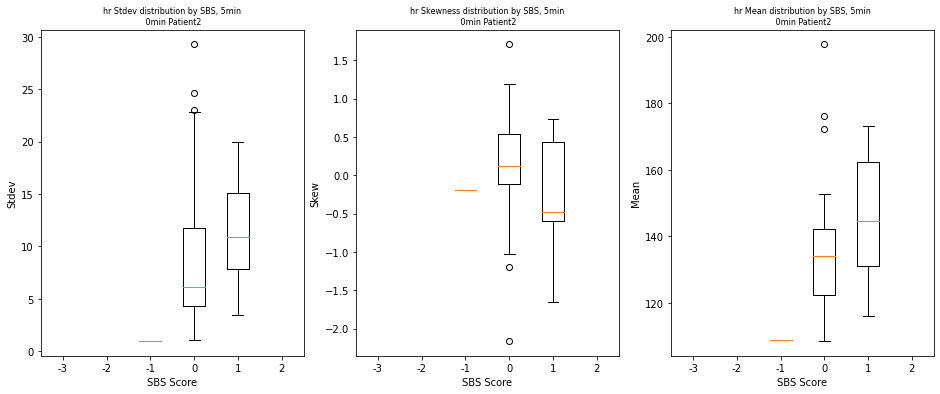

length of signal window for BoxPlot function: 150
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 23, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 26, flag_list detected
not enough data at sbs index 30, flag_list detected
not enough data at sbs index 31, flag_list detected
not enough data at sbs index 32, flag_list detected
not enough data at sbs index 33, flag_list detected
not enough data at sbs index 37, flag_list detected
not enough data at sbs index 49, flag_list detected
not enough data at sbs index 50, flag_list detected
not enough data at sbs index 51, flag_list detected
not enough data at sbs index 52, flag_list detected
not enough data at sbs index 53, flag_list detected
not enough data at sbs index 54, flag_list detected
not enough dat

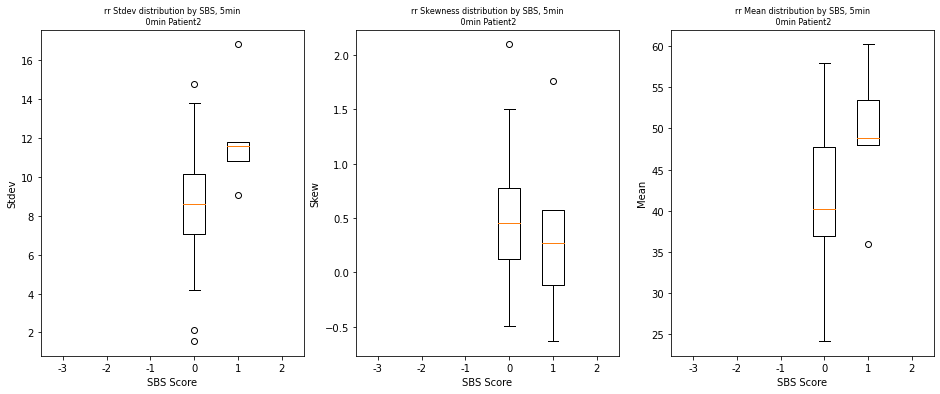

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 24, flag_list detected
not enough data at sbs index 33, flag_list detected
not enough data at sbs index 53, flag_list detected
not enough data at sbs index 58, flag_list detected


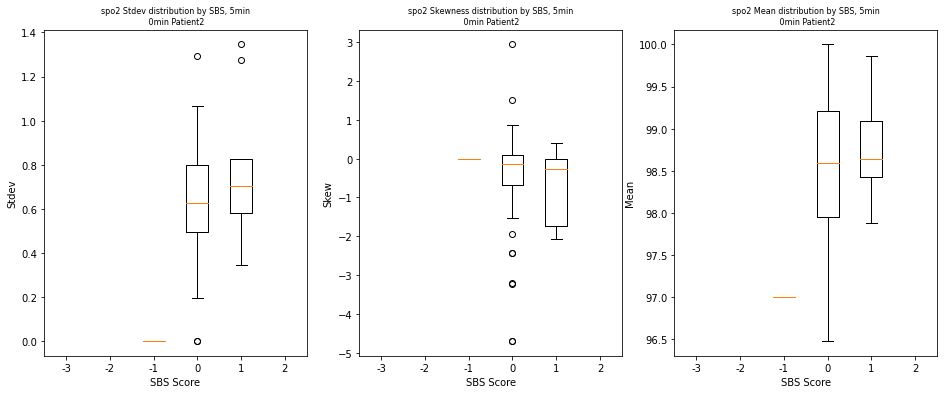

length of signal window for BoxPlot function: 150


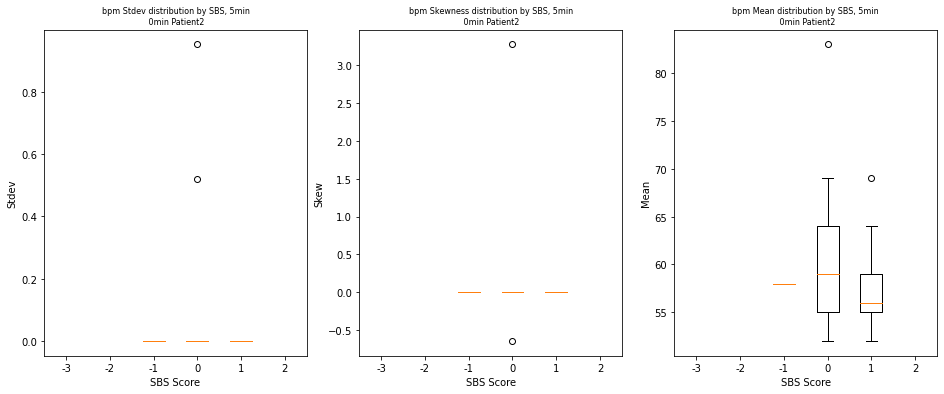

length of signal window for BoxPlot function: 150


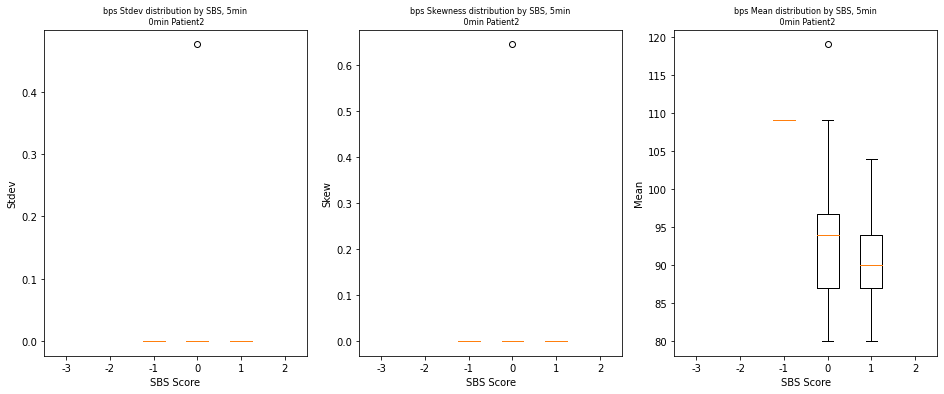

length of signal window for BoxPlot function: 150


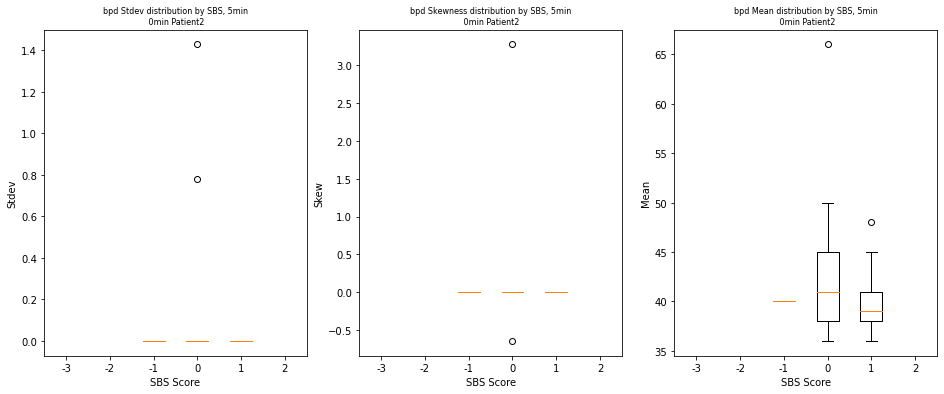

original hr vitals array shape: (32, 150) 
hr SBS index 0 has insufficient data, zeros appended in place
hr SBS index 21 has insufficient data, zeros appended in place
final hr vitals array shape: (32, 150)
original rr vitals array shape: (32, 150) 
rr SBS index 0 has insufficient data, zeros appended in place
rr SBS index 1 has insufficient data, zeros appended in place
rr SBS index 2 has insufficient data, zeros appended in place
rr SBS index 3 has insufficient data, zeros appended in place
rr SBS index 4 has insufficient data, zeros appended in place
rr SBS index 5 has insufficient data, zeros appended in place
rr SBS index 6 has insufficient data, zeros appended in place
rr SBS index 7 has insufficient data, zeros appended in place
rr SBS index 8 has insufficient data, zeros appended in place
rr SBS index 9 has insufficient data, zeros appended in place
rr SBS index 10 has insufficient data, zeros appended in place
rr SBS index 11 has insufficient data, zeros appended in place
rr S

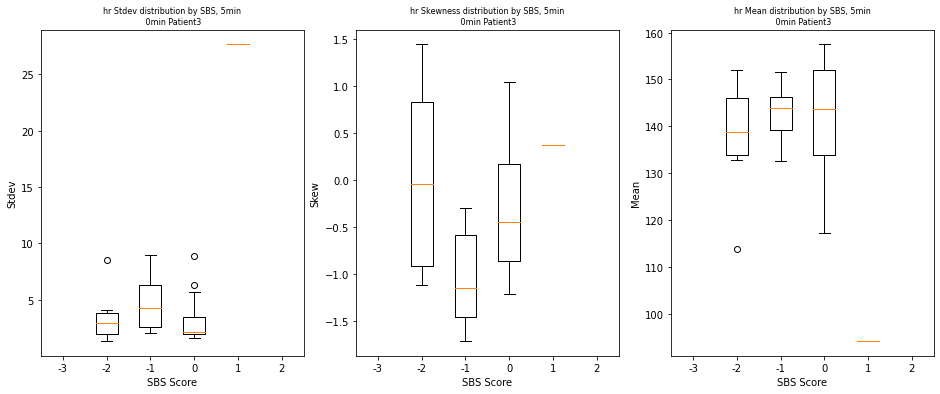

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 17, flag_list detected
not enough data at sbs i

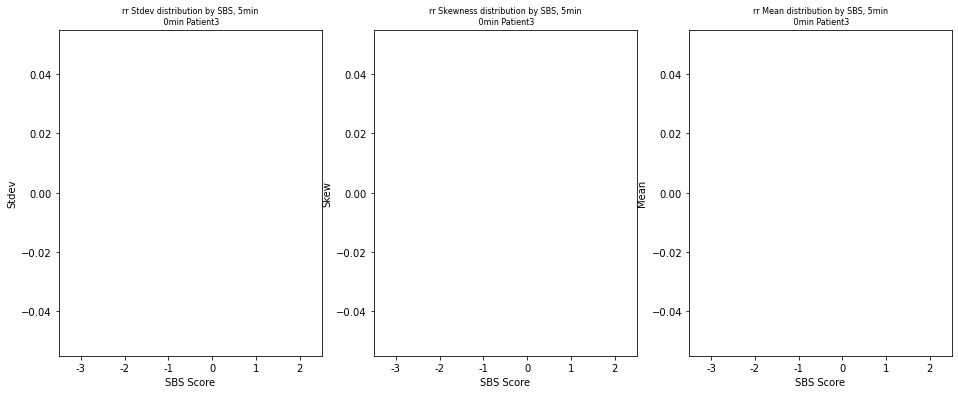

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 21, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 23, flag_list detected


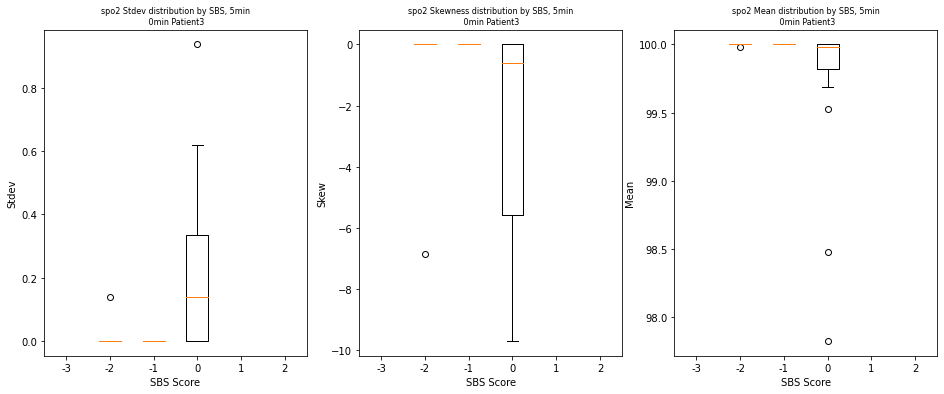

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 17, flag_list detected
not enough data at sbs i

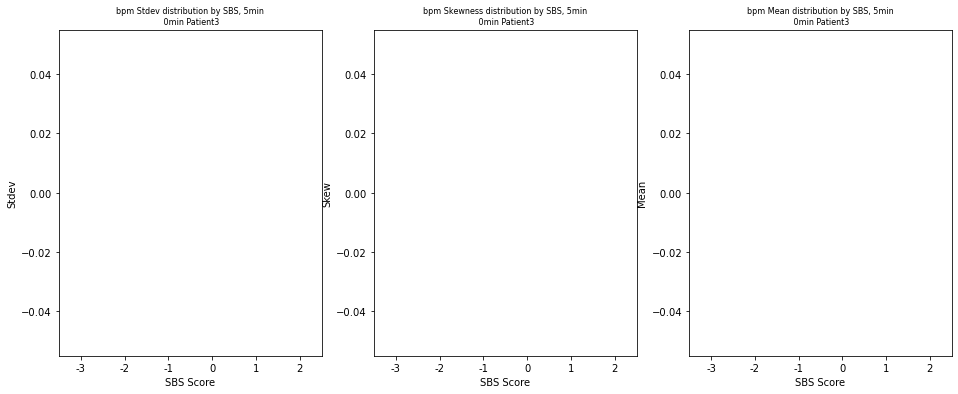

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 17, flag_list detected
not enough data at sbs i

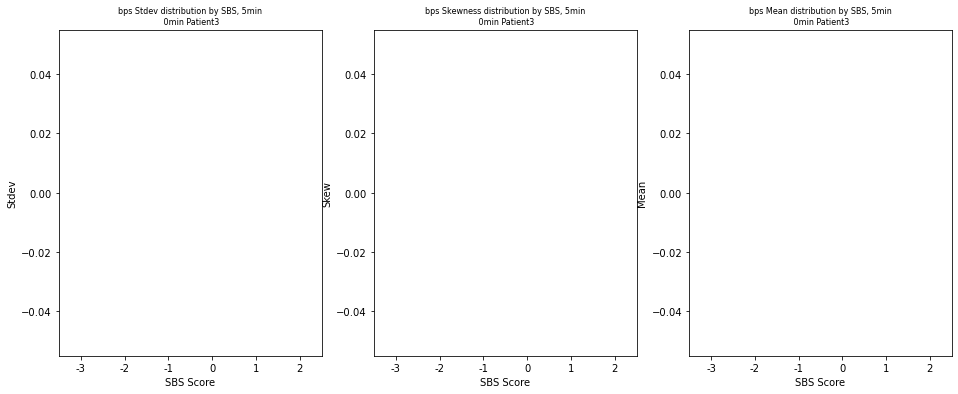

length of signal window for BoxPlot function: 150
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 4, flag_list detected
not enough data at sbs index 5, flag_list detected
not enough data at sbs index 6, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 8, flag_list detected
not enough data at sbs index 9, flag_list detected
not enough data at sbs index 10, flag_list detected
not enough data at sbs index 11, flag_list detected
not enough data at sbs index 12, flag_list detected
not enough data at sbs index 13, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 15, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 17, flag_list detected
not enough data at sbs i

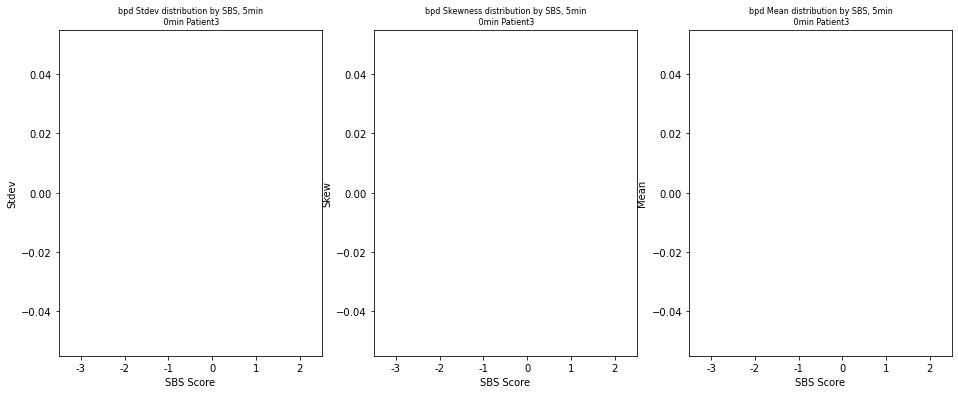

In [14]:

#There is no error handling in place, the .mat file must exist
for patient in os.listdir(data_dir):
    # filter out non-directories
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):
        data_filepath_accel = os.path.join(patient_dir, f'{patient}_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated.mat')           
        data_filepath_vitals = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Validated_Stim.mat')
        
        accel_data = loadmat(data_filepath_accel)
        x_mag = accel_data["x_mag"]
        accel_SBS = accel_data["sbs"].flatten()
        
        vitals_data = loadmat(data_filepath_vitals)
        temp_hr = vitals_data['heart_rate']
        temp_SpO2 = vitals_data['SpO2']
        temp_rr = vitals_data['respiratory_rate']
        temp_bps = vitals_data['blood_pressure_systolic']
        temp_bpm = vitals_data['blood_pressure_mean']
        temp_bpd = vitals_data['blood_pressure_diastolic']
        vitals_SBS = vitals_data['sbs'].flatten()
        hr = []
        rr = []
        SpO2 = []
        bpm = []
        bps = []
        bpd = []
        vitals_list = [hr,rr,SpO2,bpm,bps,bpd]
        vitals_names = ['hr','rr','spo2','bpm','bps','bpd']
        temp_vitals = [temp_hr,temp_rr, temp_SpO2,temp_bpm,temp_bps,temp_bpd] 
        
        flag_list = [0] * (int)(sr * 60 * slice_size_min) #generate a list to insert in place of invalid data, 
        #this list serves as a flag for a window to ignore in the box plot function

        for j in range(len(vitals_list)): #go through every vitals metric
            print(f'original {vitals_names[j]} vitals array shape: {np.array(temp_vitals[j]).shape} ')
            for i in range(len(vitals_SBS)): #go through every SBS score for each vitals metric
                if (Filtering.checkVitals(temp_vitals[j][i], slice_size_min, vitals_names[j])): #check the data in a single window
                    vitals_list[j].append(temp_vitals[j][i]) #append that single window data to the 2D hr,rr,spo2,bpm,bps,bpd arrays if that window's data is valid
                else:
                    vitals_list[j].append(flag_list) #append an array of zeros for window number i for the jth vitals metric if the data is invalid(i.e. too many NaN points)
                    print(f'{vitals_names[j]} SBS index {i} has insufficient data, zeros appended in place') 
            print(f'final {vitals_names[j]} vitals array shape: {np.array(vitals_list[j]).shape}') #should be the number of SBS scores by the number of samples in a window

        #Call Functions for Analysis for each patient here!

        # ACTIGRAPH BOX PLOTS
        ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot(accel_SBS, x_mag, window_size, show_outlier=True)
        ax1[0,0].set_title(f'MAD distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[0,1].set_title(f'MAD Skewness distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,0].set_title(f'MAD Mean distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,1].set_title(f'MAD Standard Deviation distribution by SBS, window=100, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        plt.show()

        #VITALS BOX PLOTS
        index = 0
        for k in  range(len(vitals_list)): 
            signal = (np.array(vitals_list[k])) 
            print(f'length of signal window for BoxPlot function: {len(signal[0])}') #should be the number of samples in a window
            ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(vitals_SBS, signal, window_size, show_outlier=True) #boxplot function iterates through 2D array
            ax2[0].set_title(f'{vitals_names[index]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[1].set_title(f'{vitals_names[index]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[2].set_title(f'{vitals_names[index]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            index+=1
            plt.show()